### Here we read data generated in Subtask 5.1 to perform DNN-SE

# Import required libraries

In [2]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation, BatchNormalization, Dropout
from tensorflow.keras.callbacks import EarlyStopping, TensorBoard, ReduceLROnPlateau, ModelCheckpoint
from tensorflow.keras.optimizers import Adam, SGD
from tensorflow.keras.backend import gradients
import tensorflow as tf
import pandas as pd
import numpy as np
from sklearn import metrics
from sklearn.metrics import mean_absolute_error, mean_absolute_percentage_error
from tensorflow.keras import regularizers
from sklearn.utils import shuffle
from tensorflow.keras import losses
import h5py
from tensorflow.keras.layers import LeakyReLU
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
from time import time 

# # np.random.seed(123)
# # python_random.seed(123)
# # tf.random.set_seed(123)

In [3]:
#Import Training Dataset

x_train = pd.read_csv('x_train_Gaussian.csv', header = None)
y_train = pd.read_csv('y_train_Gaussian.csv', header = None)

#Import Test Dataset
x_test = pd.read_csv('x_test_Gaussian.csv', header = None)
y_test = pd.read_csv('y_test_Gaussian.csv', header = None)


#Convert to numpy
x_train = x_train.to_numpy()
y_train = y_train.to_numpy()
x_test = x_test.to_numpy()
y_test = y_test.to_numpy()


In [4]:
y_train.shape

(10000, 172)

# Normalization Process 

In [5]:
def normalize(x):
    
    x_min = np.amin(x)
    x_max = np.amax(x)
    x_norm = (x-x_min)/(x_max-x_min)
    
    return x_norm,x_min,x_max

In [6]:
#Normalizing Data
x_normalized_train = np.zeros(x_train.shape) 
y_normalized_train = np.zeros(y_train.shape)  
x_normalized_test = np.zeros(x_test.shape)
y_normalized_test = np.zeros(y_test.shape)  


for i in range(x_train.shape[1]):
    t1,x_min,x_max = normalize(x_train[:,i])
    x_normalized_train[:,i] = t1
    x_normalized_test[:,i] = (x_test[:,i]-x_min)/(x_max-x_min)
    

for j in range(y_train.shape[1]):
    t2,y_min,y_max = normalize(y_train[:,j])
    y_normalized_train[:,j] = t2
    y_normalized_test[:,j] = (y_test[:,j]-y_min)/(y_max-y_min)


# x_normalized_test = (x_test-x_min)/(x_max-x_min)
# y_normalized_test = (y_test-y_min)/(y_max-y_min)

In [7]:
main_y_train = y_train
main_x_train = x_train
main_y_test = y_test
main_x_test = x_test

### Data cleaning

In [8]:
max_x_train = np.amax(x_normalized_train)
min_x_train = np.amin(x_normalized_train)
max_x_test = np.amax(x_normalized_test)
min_x_test = np.amin(x_normalized_test)

max_y_train = np.amax(y_normalized_train)
min_y_train = np.amin(y_normalized_train)
max_y_test = np.amax(y_normalized_test)
min_y_test = np.amin(y_normalized_test)

print('max_x_train = ',max_x_train,'\n',
      'min_x_train = ',min_x_train,'\n',
      'max_x_test= ',max_x_test,'\n',
      'min_x_test',min_x_test,'\n',
      'max_y_train = ',max_y_train,'\n',
      'min_y_train = ',min_y_train,'\n',

      'max_y_test= ',max_y_test,'\n',
      'min_y_test',min_y_test,'\n',
     )

max_x_train =  1.0 
 min_x_train =  0.0 
 max_x_test=  1.172592543142508 
 min_x_test -0.04794010926878343 
 max_y_train =  1.0 
 min_y_train =  0.0 
 max_y_test=  1.0093936793122285 
 min_y_test -0.014318523942159244 



In [ ]:
y_normalized_train[np.isnan(y_normalized_train)] = 0
y_normalized_test[np.isnan(y_normalized_test)] = 0
x_normalized_train[np.isnan(x_normalized_train)] = 0
x_normalized_test[np.isnan(x_normalized_test)] = 0

In [9]:
# split train and validation 
x_train, x_val, y_train, y_val = train_test_split(x_normalized_train, y_normalized_train, test_size=0.2)

x_test = x_normalized_test
y_test = y_normalized_test

# Build the neural network

Epoch 1/100
241/250 [===========================>..] - ETA: 0s - loss: 1.7540 - MSE: 1.7540
Epoch 1: val_loss improved from inf to 0.05254, saving model to weights.best.hdf5
250/250 [==============================] - 3s 6ms/step - loss: 1.7101 - MSE: 1.7101 - val_loss: 0.0525 - val_MSE: 0.0525 - lr: 0.0010
Epoch 2/100
237/250 [===========================>..] - ETA: 0s - loss: 0.2566 - MSE: 0.2566
Epoch 2: val_loss improved from 0.05254 to 0.02234, saving model to weights.best.hdf5
250/250 [==============================] - 1s 5ms/step - loss: 0.2487 - MSE: 0.2487 - val_loss: 0.0223 - val_MSE: 0.0223 - lr: 0.0010
Epoch 3/100
245/250 [============================>.] - ETA: 0s - loss: 0.0609 - MSE: 0.0609
Epoch 3: val_loss improved from 0.02234 to 0.01925, saving model to weights.best.hdf5
250/250 [==============================] - 1s 5ms/step - loss: 0.0604 - MSE: 0.0604 - val_loss: 0.0192 - val_MSE: 0.0192 - lr: 0.0010
Epoch 4/100
238/250 [===========================>..] - ETA: 0s - los

Epoch 28/100
242/250 [============================>.] - ETA: 0s - loss: 0.0125 - MSE: 0.0125
Epoch 28: val_loss improved from 0.00809 to 0.00757, saving model to weights.best.hdf5
250/250 [==============================] - 1s 5ms/step - loss: 0.0125 - MSE: 0.0125 - val_loss: 0.0076 - val_MSE: 0.0076 - lr: 0.0010
Epoch 29/100
248/250 [============================>.] - ETA: 0s - loss: 0.0121 - MSE: 0.0121
Epoch 29: val_loss improved from 0.00757 to 0.00724, saving model to weights.best.hdf5
250/250 [==============================] - 1s 4ms/step - loss: 0.0121 - MSE: 0.0121 - val_loss: 0.0072 - val_MSE: 0.0072 - lr: 0.0010
Epoch 30/100
248/250 [============================>.] - ETA: 0s - loss: 0.0119 - MSE: 0.0119
Epoch 30: val_loss did not improve from 0.00724
250/250 [==============================] - 1s 4ms/step - loss: 0.0119 - MSE: 0.0119 - val_loss: 0.0075 - val_MSE: 0.0075 - lr: 0.0010
Epoch 31/100
250/250 [==============================] - ETA: 0s - loss: 0.0116 - MSE: 0.0116
Epoc

Epoch 56/100
241/250 [===========================>..] - ETA: 0s - loss: 0.0084 - MSE: 0.0084
Epoch 56: val_loss did not improve from 0.00501
250/250 [==============================] - 1s 5ms/step - loss: 0.0084 - MSE: 0.0084 - val_loss: 0.0051 - val_MSE: 0.0051 - lr: 0.0010
Epoch 57/100
247/250 [============================>.] - ETA: 0s - loss: 0.0084 - MSE: 0.0084
Epoch 57: val_loss improved from 0.00501 to 0.00488, saving model to weights.best.hdf5
250/250 [==============================] - 1s 5ms/step - loss: 0.0084 - MSE: 0.0084 - val_loss: 0.0049 - val_MSE: 0.0049 - lr: 0.0010
Epoch 58/100
243/250 [============================>.] - ETA: 0s - loss: 0.0083 - MSE: 0.0083
Epoch 58: val_loss did not improve from 0.00488
250/250 [==============================] - 1s 4ms/step - loss: 0.0083 - MSE: 0.0083 - val_loss: 0.0050 - val_MSE: 0.0050 - lr: 0.0010
Epoch 59/100
248/250 [============================>.] - ETA: 0s - loss: 0.0083 - MSE: 0.0083
Epoch 59: val_loss did not improve from 0.0

Epoch 85/100
241/250 [===========================>..] - ETA: 0s - loss: 0.0077 - MSE: 0.0077
Epoch 85: val_loss did not improve from 0.00451
250/250 [==============================] - 1s 4ms/step - loss: 0.0077 - MSE: 0.0077 - val_loss: 0.0045 - val_MSE: 0.0045 - lr: 0.0010
Epoch 86/100
247/250 [============================>.] - ETA: 0s - loss: 0.0077 - MSE: 0.0077
Epoch 86: val_loss did not improve from 0.00451
250/250 [==============================] - 1s 4ms/step - loss: 0.0077 - MSE: 0.0077 - val_loss: 0.0047 - val_MSE: 0.0047 - lr: 0.0010
Epoch 87/100
245/250 [============================>.] - ETA: 0s - loss: 0.0077 - MSE: 0.0077
Epoch 87: val_loss did not improve from 0.00451
250/250 [==============================] - 1s 5ms/step - loss: 0.0077 - MSE: 0.0077 - val_loss: 0.0047 - val_MSE: 0.0047 - lr: 0.0010
Epoch 88/100
246/250 [============================>.] - ETA: 0s - loss: 0.0077 - MSE: 0.0077
Epoch 88: val_loss improved from 0.00451 to 0.00445, saving model to weights.best.

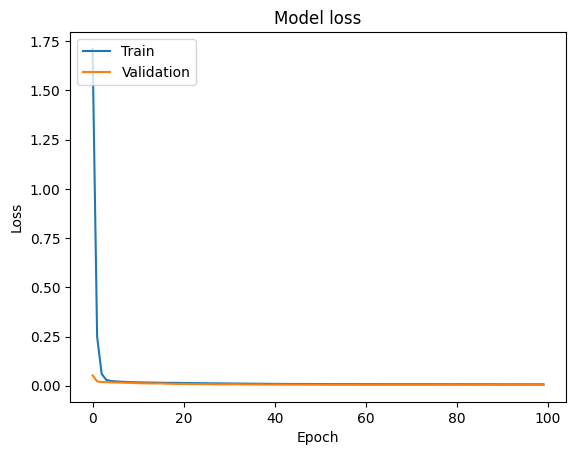

In [10]:
dp = 0.5 # set Dropout rate 
nu = 200 # number of neurons in each layer 
ne = 100 # number of epochs

#################################### Model Architecture #############################################
model = Sequential()

model.add(Dense(nu, activation='relu', input_dim=x_train.shape[1], kernel_initializer='he_normal')) # Hidden 1
model.add(BatchNormalization())
model.add(Dropout(dp))

model.add(Dense(nu, activation='relu', kernel_initializer='he_normal')) # Hidden 2
model.add(BatchNormalization())
model.add(Dropout(dp))

model.add(Dense(nu, activation='relu', kernel_initializer='he_normal')) # Hidden 3
model.add(BatchNormalization())
model.add(Dropout(dp))

model.add(Dense(nu, activation='relu', kernel_initializer='he_normal')) # Hidden 4
model.add(BatchNormalization())
model.add(Dropout(dp))

model.add(Dense(nu, activation='relu', kernel_initializer='he_normal')) # Hidden 5
model.add(BatchNormalization())
model.add(Dropout(dp))

# model.add(Dense(nu, activation='relu', kernel_initializer='he_normal')) # Hidden 6

# model.add(Dense(300, activation='relu', kernel_initializer='he_normal')) # Hidden 7



model.add(Dense(y_train.shape[1], activation='linear',kernel_initializer='he_normal')) # Output

################################## Model Configuration #####################################

loss_fn = losses.MeanSquaredError() # set loss function 
Adam(learning_rate=0.09456, beta_1=0.9, beta_2=0.999, amsgrad=False) # set configuration of Optimizer
model.compile(loss=loss_fn, optimizer='adam', metrics=['MSE'])

reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.2,patience=10, min_lr=0.0001)
filepath="weights.best.hdf5"
checkpoint = ModelCheckpoint(filepath,save_weights_only=True, monitor='val_loss', verbose=1, save_best_only=True, mode='min')



history = model.fit(x_train,y_train,verbose=1,epochs=ne , validation_data = (x_val,y_val),callbacks=[checkpoint,reduce_lr])


    
# plot training history
plt.figure()
plt.plot(history.history['loss'], label='train')
plt.plot(history.history['val_loss'], label='validation')
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')


In [11]:
even_index = np.arange(0,y_test.shape[1],2) #Index for magnitudes
odd_index = np.arange(1,y_test.shape[1],2) #Index for angles
odd_index

array([  1,   3,   5,   7,   9,  11,  13,  15,  17,  19,  21,  23,  25,
        27,  29,  31,  33,  35,  37,  39,  41,  43,  45,  47,  49,  51,
        53,  55,  57,  59,  61,  63,  65,  67,  69,  71,  73,  75,  77,
        79,  81,  83,  85,  87,  89,  91,  93,  95,  97,  99, 101, 103,
       105, 107, 109, 111, 113, 115, 117, 119, 121, 123, 125, 127, 129,
       131, 133, 135, 137, 139, 141, 143, 145, 147, 149, 151, 153, 155,
       157, 159, 161, 163, 165, 167, 169, 171])

In [12]:
# Evaluation
start_SE = time()
pred = model.predict(x_test)
end_SE = time()
elapsed_time = end_SE - start_SE

pred_actual = np.zeros(y_test.shape)

for j in range(main_y_train.shape[1]):
    t2,y_min,y_max = normalize(main_y_train[:,j])
    pred_actual[:,j] = (pred[:,j]*(y_max-y_min))+y_min
    
even_index = np.arange(0,y_test.shape[1],2)
odd_index = np.arange(1,y_test.shape[1],2)

pred_mag_actual = pred_actual[:,even_index]
pred_ang_actual = pred_actual[:,odd_index]*180/np.pi

phase_MAE = mean_absolute_error(pred_actual[:,odd_index], main_y_test[:,odd_index])*180/np.pi
#Formulate MAPE by my own
mag_MAPE = np.sum(abs((main_y_test[:,even_index]-pred_actual[:,even_index])/main_y_test[:,even_index]))/main_y_test[:,even_index].shape[0]/(main_y_test[:,even_index].shape[1])*100
#MAPE using the function (both give the same results)
mag_MAPE2 = mean_absolute_percentage_error(pred_actual[:,even_index], main_y_test[:,even_index])

print('MAE and MAPE Losses Based on Actual Data')
print(f'MAE_ang: {phase_MAE:.5f}, MAPE_mag: {mag_MAPE:.7f}')


79/79 [==============================] - 0s 1ms/step
MAE and MAPE Losses Based on Actual Data
MAE_ang: 0.01578, MAPE_mag: 0.0601505


### Here we want to plot a bar chart of estimation error for each phase separately.

In [15]:
# Import phase indexes obtained from MATLAB codes
phase_A_index = pd.read_csv('phase_A_index.csv', header = None)
phase_B_index = pd.read_csv('phase_B_index.csv', header = None)
phase_C_index = pd.read_csv('phase_C_index.csv', header = None)

#Convert to numpy
phase_A_index = (phase_A_index-1).to_numpy().reshape(phase_A_index.shape[0],) #Subtract 1 from indexes to start from index 0
phase_B_index = (phase_B_index-1).to_numpy().reshape(phase_B_index.shape[0],)
phase_C_index = (phase_C_index-1).to_numpy().reshape(phase_C_index.shape[0],)

In [16]:
# Calculate MAE for phase angles and MAPE for magnitudes separately for each phase


main_y_test_mag = main_y_test[:,even_index]
main_y_test_ang = main_y_test[:,odd_index]


mag_MAPE_phase_A = np.sum(abs((main_y_test_mag[:,phase_A_index]-pred_mag_actual[:,phase_A_index])/main_y_test_mag[:,phase_A_index]), axis=0)/main_y_test_mag[:,phase_A_index].shape[0]*100
mag_MAPE_phase_B = np.sum(abs((main_y_test_mag[:,phase_B_index]-pred_mag_actual[:,phase_B_index])/main_y_test_mag[:,phase_B_index]), axis=0)/main_y_test_mag[:,phase_B_index].shape[0]*100
mag_MAPE_phase_C = np.sum(abs((main_y_test_mag[:,phase_C_index]-pred_mag_actual[:,phase_C_index])/main_y_test_mag[:,phase_C_index]), axis=0)/main_y_test_mag[:,phase_C_index].shape[0]*100

# mag_MAPE_phase_A = np.sum(abs((main_y_test_mag[:,phase_A_index]-pred_mag_actual[:,phase_A_index])/main_y_test_mag[:,phase_A_index]), axis=0)/main_y_test_mag[:,phase_A_index].shape[0]*100
# mag_MAPE_phase_B = np.sum(abs((main_y_test_mag[:,phase_B_index]-pred_mag_actual[:,phase_B_index])/main_y_test_mag[:,phase_B_index]), axis=0)/main_y_test_mag[:,phase_B_index].shape[0]*100
# mag_MAPE_phase_C = np.sum(abs((main_y_test_mag[:,phase_C_index]-pred_mag_actual[:,phase_C_index])/main_y_test_mag[:,phase_C_index]), axis=0)/main_y_test_mag[:,phase_C_index].shape[0]*100

ang_MAE_phase_A = np.sum(abs((main_y_test_ang[:,phase_A_index]*180/np.pi-pred_ang_actual[:,phase_A_index])), axis=0)/main_y_test_ang[:,phase_A_index].shape[0]
ang_MAE_phase_B = np.sum(abs((main_y_test_ang[:,phase_B_index]*180/np.pi-pred_ang_actual[:,phase_B_index])), axis=0)/main_y_test_ang[:,phase_B_index].shape[0]
ang_MAE_phase_C = np.sum(abs((main_y_test_ang[:,phase_C_index]*180/np.pi-pred_ang_actual[:,phase_C_index])), axis=0)/main_y_test_ang[:,phase_C_index].shape[0]


In [17]:
node_number_phase_A = [800,802,806,808,812,814,850,816,818,820,822,824,828,830,854,852,832,888,890,858,864,834,842,844,846,848,860,836,840,862]
node_number_phase_B = [800,802,806,808,810,812,814,850,816,824,826,828,830,854,856,852,832,888,890,858,834,842,844,846,848,860,836,840,862,838]
node_number_phase_C = [800,802,806,808,812,814,850,816,824,828,830,854,852,832,888,890,858,834,842,844,846,848,860,836,840,862]

In [20]:
len(node_number_phase_C + node_number_phase_A + node_number_phase_B) # 86 * 2 = 172

86

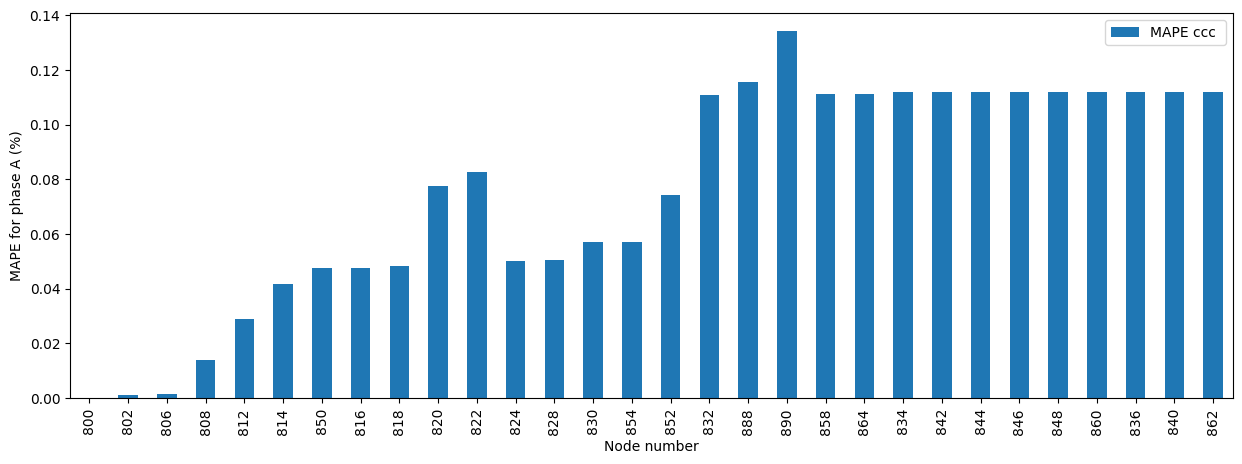

In [21]:
mag_error_phase_A = mag_MAPE_phase_A
df = pd.DataFrame({'MAPE ccc ': mag_error_phase_A }, index=node_number_phase_A)

df.plot(kind='bar',figsize=(15,5), xlabel=('Node number'), ylabel=('MAPE for phase A (%)'))
# plt.grid(which='major', linestyle='-', linewidth='0.5', color='green')
# plt.grid(which='minor', linestyle=':', linewidth='0.5', color='black')

plt.show()

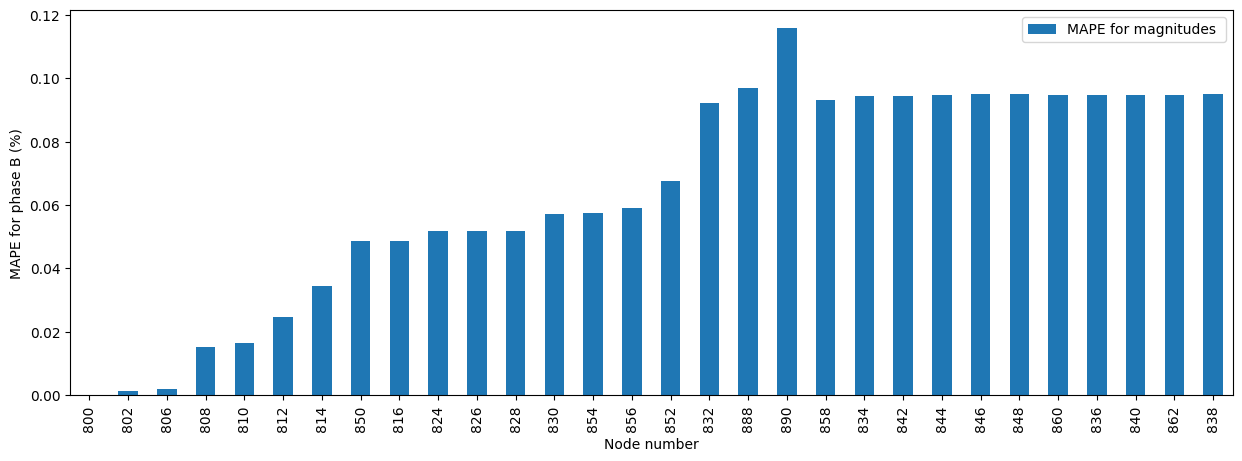

In [22]:
mag_error_phase_B = mag_MAPE_phase_B
df = pd.DataFrame({'MAPE for magnitudes ': mag_error_phase_B }, index=node_number_phase_B)

df.plot(kind='bar',figsize=(15,5), xlabel=('Node number'), ylabel=('MAPE for phase B (%)'))
plt.show()

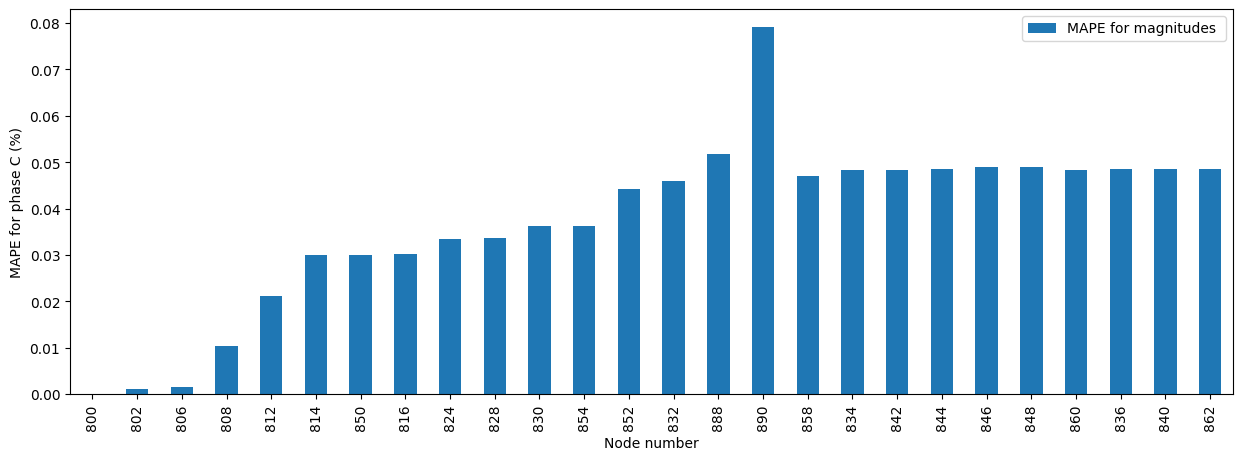

In [23]:
mag_error_phase_C = mag_MAPE_phase_C
df = pd.DataFrame({'MAPE for magnitudes ': mag_error_phase_C }, index=node_number_phase_C)

df.plot(kind='bar',figsize=(15,5), xlabel=('Node number'), ylabel=('MAPE for phase C (%)'))
plt.show()

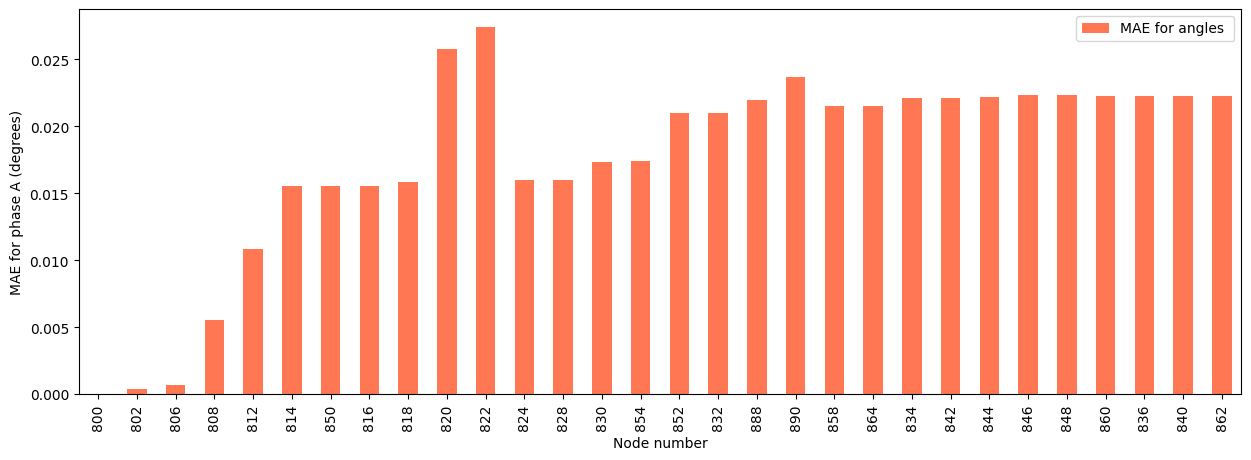

In [24]:
ang_error_phase_A = ang_MAE_phase_A
df = pd.DataFrame({'MAE for angles ': ang_error_phase_A }, index=node_number_phase_A)

df.plot(kind='bar',figsize=(15,5), color='#FF7753', xlabel=('Node number'), ylabel=('MAE for phase A (degrees)'))

plt.show()

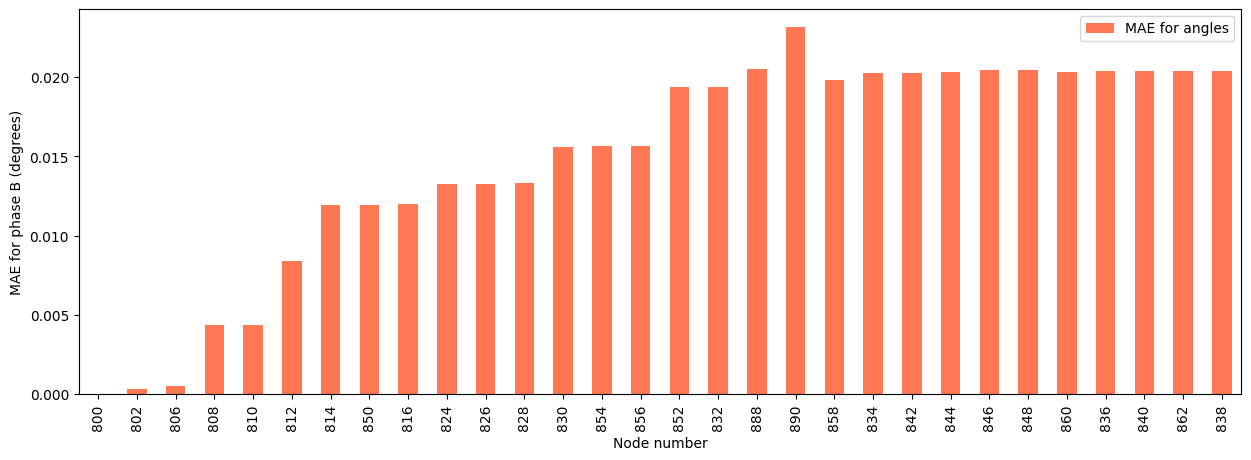

In [25]:
ang_error_phase_B = ang_MAE_phase_B
df = pd.DataFrame({'MAE for angles': ang_error_phase_B }, index=node_number_phase_B)

df.plot(kind='bar',figsize=(15,5), color='#FF7753', xlabel=('Node number'), ylabel=('MAE for phase B (degrees)'))
plt.show()

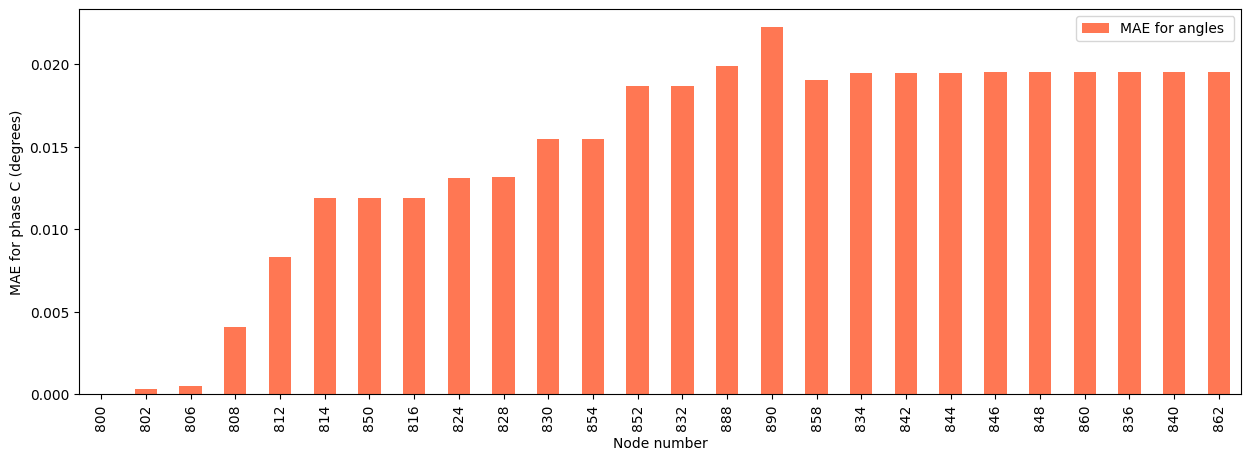

In [26]:
ang_error_phase_C = ang_MAE_phase_C
df = pd.DataFrame({'MAE for angles ': ang_error_phase_C }, index=node_number_phase_C)

df.plot(kind='bar',figsize=(15,5), color='#FF7753', xlabel=('Node number'), ylabel=('MAE for phase C (degrees)'))
plt.show()

## Plot Estimation Results on a per-bus basis for 3 phases (LSE vs. DNN-SE)

* There are 34 nodes, and 86 nodes separately sorted by *phases*.
* Each node has its Mag & Ang values, so there will be 86*2=172 values altogether.
* The first 86 values are related to Mag, the next batch is for Ang.

In [59]:
phase_C_index

array([ 2,  5,  8, 11, 15, 18, 21, 24, 28, 34, 37, 40, 71, 43, 74, 85, 46,
       49, 52, 61, 64, 67, 78, 55, 58, 81], dtype=int64)

In [43]:
len(list(phase_A_index) + list(phase_B_index) + list(phase_C_index))

86

In [76]:
# import indexes of each phase (indexes are given from SCC.m file in micro-PMU placement part)
# range of indexes: 1~172 > in Python: 0~171
#Mag
phaseA_mag_indx = list(phase_A_index) #subtract it by 1 to make it in Python index, then make it as a list
phaseB_mag_indx = list(phase_B_index)
phaseC_mag_indx = list(phase_C_index)
#Ang
shift = y_test.shape[1]/2
phaseA_ang_indx = [int(i+shift) for i in phase_A_index] 
phaseB_ang_indx = [int(i+shift) for i in phase_B_index]
phaseC_ang_indx = [int(i+shift) for i in phase_C_index]

In [72]:
# We need to stack predicted and actual Mag & Ang values first to make them ready for index grabbing
pred = np.hstack((pred_mag_actual, pred_ang_actual))
true = np.hstack((main_y_test[:,even_index],main_y_test[:,odd_index]*180/np.pi))

In [77]:
# Calculate MAE for phase angles and MAPE for magnitudes separately for each phase
mag_MAPE_phase_A = np.sum(abs((true[:,phaseA_mag_indx]-pred[:,phaseA_mag_indx])/true[:,phaseA_mag_indx]), axis=0)/true[:,phaseA_mag_indx].shape[0]*100
mag_MAPE_phase_B = np.sum(abs((true[:,phaseB_mag_indx]-pred[:,phaseB_mag_indx])/true[:,phaseB_mag_indx]), axis=0)/true[:,phaseB_mag_indx].shape[0]*100
mag_MAPE_phase_C = np.sum(abs((true[:,phaseC_mag_indx]-pred[:,phaseC_mag_indx])/true[:,phaseC_mag_indx]), axis=0)/true[:,phaseC_mag_indx].shape[0]*100

ang_MAE_phase_A = np.sum(abs((true[:,phaseA_ang_indx]-pred[:,phaseA_ang_indx])), axis=0)/true[:,phaseA_ang_indx].shape[0]
ang_MAE_phase_B = np.sum(abs((true[:,phaseB_ang_indx]-pred[:,phaseB_ang_indx])), axis=0)/true[:,phaseB_ang_indx].shape[0]
ang_MAE_phase_C = np.sum(abs((true[:,phaseC_ang_indx]-pred[:,phaseC_ang_indx])), axis=0)/true[:,phaseC_ang_indx].shape[0]

In [78]:
# Import LSE results done in MATLAB (Reetam's codes)
LSE_MAPE = pd.read_csv('MAPE_per.csv', header=None) # in %
LSE_MAE = pd.read_csv('MAE_per.csv', header=None) # in degrees

LSE =  np.hstack((LSE_MAPE.T, LSE_MAE.T))

LSE_MAPE_phase_A = LSE[:,phaseA_mag_indx].reshape(len(phaseA_mag_indx),)
LSE_MAPE_phase_B = LSE[:,phaseB_mag_indx].reshape(len(phaseB_mag_indx),)
LSE_MAPE_phase_C = LSE[:,phaseC_mag_indx].reshape(len(phaseC_mag_indx),)

LSE_MAE_phase_A = LSE[:,phaseA_ang_indx].reshape(len(phaseA_ang_indx),)
LSE_MAE_phase_B = LSE[:,phaseB_ang_indx].reshape(len(phaseB_ang_indx),)
LSE_MAE_phase_C = LSE[:,phaseC_ang_indx].reshape(len(phaseC_ang_indx),)

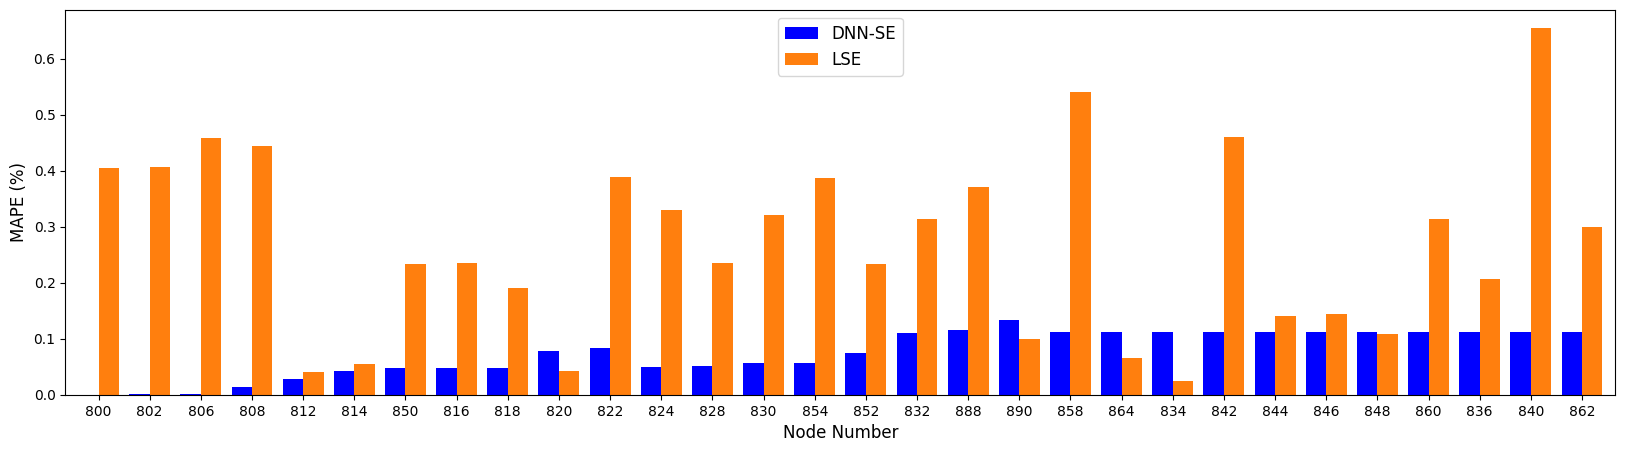

In [87]:
# create a DataFrame with the data
df = pd.DataFrame({'DNN-SE': mag_MAPE_phase_A,
                   'LSE': LSE_MAPE_phase_A} , index=node_number_phase_A)
colors = ['blue', '#ff7f0e']
# plot the data as a double bar chart
ax = df.plot(kind='bar', figsize=(20,5), width=0.8, color=colors)


# increase the font size of the x and y axis labels
ax.set_xlabel('Node Number', fontsize=12)
ax.set_ylabel('MAPE (%)', fontsize=12)

# set the legend to show above the chart
ax.legend(loc=9, fontsize=12)

# remove x-axis ticks
ax.set_xticks(range(len(node_number_phase_A)))
ax.set_xticklabels(node_number_phase_A, rotation=0)

# show the chart
plt.show()

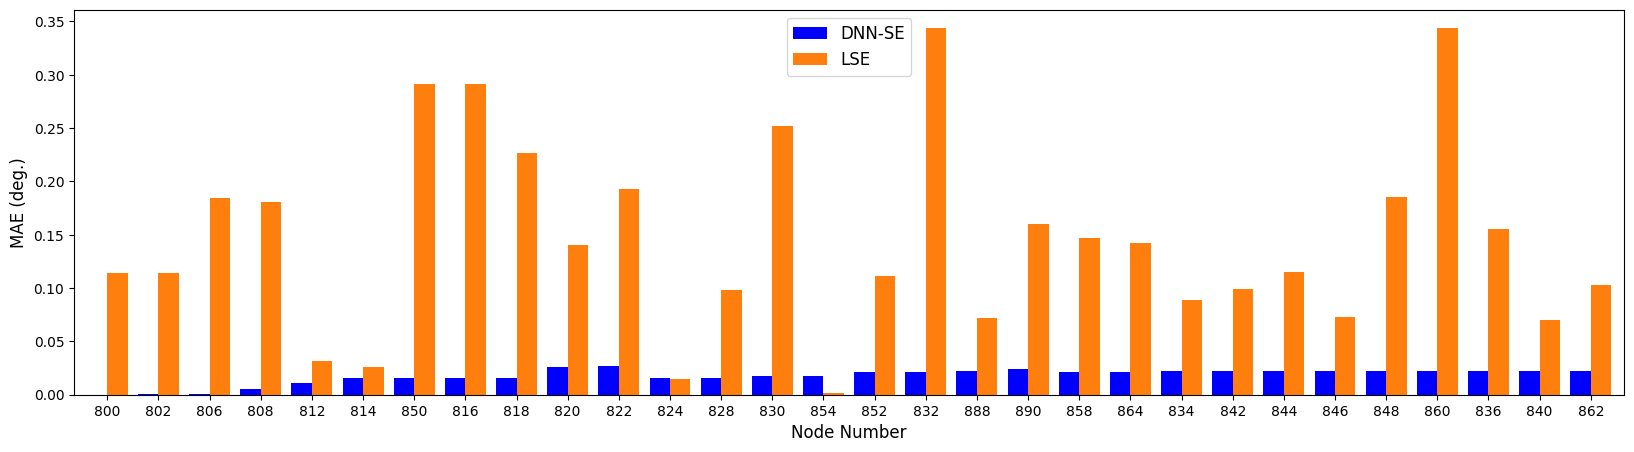

In [84]:
# create a DataFrame with the data
df = pd.DataFrame({'DNN-SE': ang_MAE_phase_A,
                   'LSE': LSE_MAE_phase_A}, index=node_number_phase_A)
colors = ['blue', '#ff7f0e']
# plot the data as a double bar chart
ax = df.plot(kind='bar', figsize=(20,5), width=0.8, color=colors)

# set the legend to show above the chart
ax.legend(loc=9, fontsize=12)

# increase the font size of the x and y axis labels
ax.set_xlabel('Node Number', fontsize=12)
ax.set_ylabel('MAE (deg.)', fontsize=12)

# set the x-axis tick labels
ax.set_xticks(range(len(node_number_phase_A)))
ax.set_xticklabels(node_number_phase_A, rotation=0)  # adjust rotation as needed

# show the chart
plt.show()
